<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [69]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [70]:
# Read CSV
data = df = pd.read_csv("Sacramento_transactions.csv")
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [71]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [72]:
df.dtypes


street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

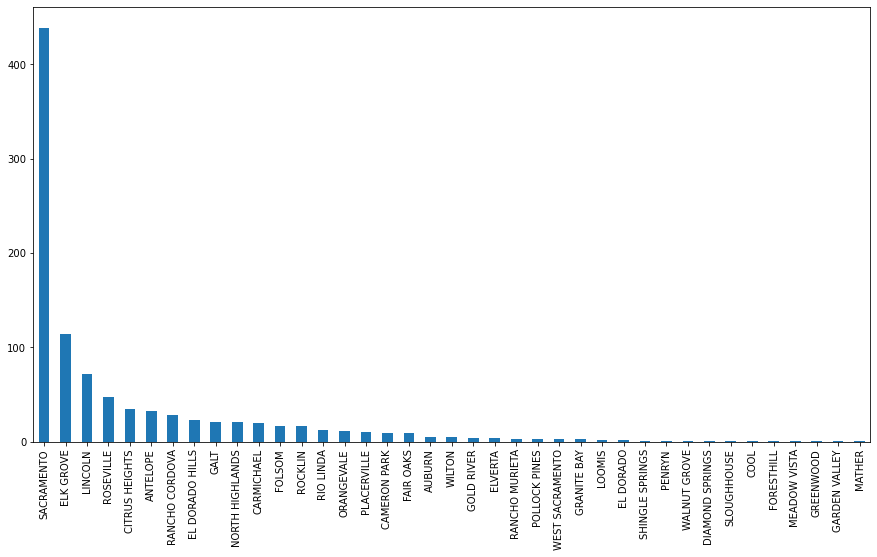

In [73]:
plt.figure(figsize = (15,8))
df.city.value_counts().plot(kind = 'bar')
plt.show()


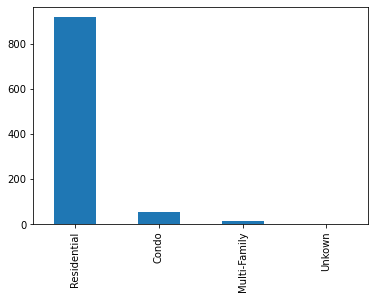

In [74]:
df.type.value_counts().plot(kind = "bar")
plt.show()

Text(0, 0.5, 'baths')

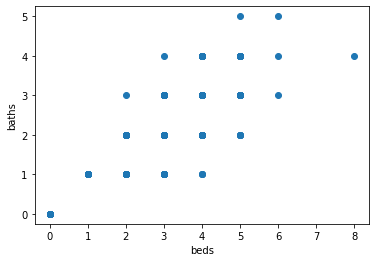

In [75]:
plt.scatter(x = df.beds, y = df.baths)
plt.xlabel('beds')
plt.ylabel('baths')

In [106]:
# create another type ==> plot with 0 beds
df.loc[df['beds'] == 0, 'type'] = 'Plot'

In [107]:
df.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Plot'], dtype=object)

In [76]:
df.groupby('type').agg({'price':[min, max]})

price        
                 min     max
type                        
Condo          40000  360000
Multi-Family  100000  416767
Residential     1551  884790
Unkown        275000  275000

In [77]:
df.price.mean()

234144.26395939087

<AxesSubplot:>

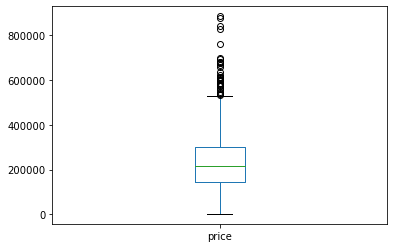

In [78]:
df.price.plot(kind = 'box')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [79]:
# ANSWER
#Price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [80]:
# ANSWER
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [81]:
# ANSWER

df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [82]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [83]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)  # reshape into a nx1 array in order to be able to fit.
Y = data['price'].values.reshape(-1,1)

print(X.shape,Y.shape)


(985, 1) (985, 1)


In [108]:
# define model
model = LinearRegression()


# fit X, Y into LinearRegresiion model
model.fit(X,Y)





LinearRegression()

In [85]:
#predict price given X and assign to y_hat
y_hat = model.predict(X)
y_hat

array([[208206.78418661],
       [226133.29392351],
       [206040.43859907],
       [209073.32242163],
       [206094.59723876],
       [223696.15513753],
       [222721.29962314],
       [226674.8803204 ],
       [213893.44135391],
       [224995.96249005],
       [212160.36488387],
       [232740.64796551],
       [210102.33657571],
       [218171.9738893 ],
       [218280.29116868],
       [224346.05881379],
       [208640.05330412],
       [205986.27995938],
       [194775.44154385],
       [236369.27682465],
       [223479.52057878],
       [234906.99355306],
       [230086.87462078],
       [249638.14354834],
       [211727.09576636],
       [221854.76138812],
       [215084.93142705],
       [223533.67921846],
       [237669.08417717],
       [230520.14373828],
       [219200.98804338],
       [225320.91432819],
       [237669.08417717],
       [223371.2032994 ],
       [219200.98804338],
       [239727.11248533],
       [221529.80954999],
       [242651.67902852],
       [2249

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [86]:
# ANSWER

LinearRegression.score(model,X,Y)

0.11148717682951437

In [87]:
# alternative method to get score
model.score(X,Y)

0.11148717682951437

### 3. Splitting Data

In [88]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [89]:
# ANSWER
## Create training and testing subsets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train, X_test, Y_train, Y_test

(array([[1758],
        [1643],
        [2354],
        [   0],
        [1354],
        [   0],
        [ 958],
        [1232],
        [ 888],
        [1440],
        [1051],
        [1266],
        [2575],
        [1915],
        [1718],
        [2109],
        [   0],
        [2052],
        [1039],
        [2169],
        [2110],
        [1691],
        [1316],
        [1380],
        [   0],
        [ 722],
        [   0],
        [1219],
        [   0],
        [1686],
        [1627],
        [ 722],
        [1104],
        [1120],
        [1264],
        [   0],
        [3173],
        [   0],
        [1751],
        [3433],
        [2592],
        [   0],
        [1137],
        [1816],
        [1922],
        [   0],
        [1450],
        [   0],
        [ 952],
        [1207],
        [   0],
        [3612],
        [   0],
        [1943],
        [1407],
        [1766],
        [2457],
        [   0],
        [ 901],
        [1872],
        [2004],
        [1578],
        

#### 3.2 Check Shape, Sample of Test Train Data

In [90]:
# ANSWER
## Check training/test data

print(X_train.shape) 

print(Y_train.shape)

print(X_test.shape)

print(Y_test.shape)

(659, 1)
(659, 1)
(326, 1)
(326, 1)


In [91]:
X_test[:10]

array([[ 906],
       [2382],
       [1962],
       [1739],
       [1527],
       [   0],
       [   0],
       [1900],
       [   0],
       [   0]], dtype=int64)

In [92]:
X_train[:10]

array([[1758],
       [1643],
       [2354],
       [   0],
       [1354],
       [   0],
       [ 958],
       [1232],
       [ 888],
       [1440]], dtype=int64)

In [93]:
Y_test[:10]

array([[ 77000],
       [236000],
       [240971],
       [221000],
       [293993],
       [  4897],
       [215000],
       [361745],
       [222500],
       [307000]], dtype=int64)

In [94]:
Y_train[:10]

array([[217500],
       [ 99000],
       [335750],
       [488750],
       [104000],
       [119000],
       [244960],
       [170000],
       [125000],
       [292000]], dtype=int64)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [95]:
model2 = LinearRegression()

model2.fit(X_train, Y_train)

LinearRegression()

In [96]:
Y_hat =model2.predict(X_test)
Y_hat

array([[209458.52761247],
       [279472.71169224],
       [259549.97638499],
       [248971.95263852],
       [238915.71481676],
       [166482.34144969],
       [166482.34144969],
       [256609.00117297],
       [166482.34144969],
       [166482.34144969],
       [217807.10240789],
       [166482.34144969],
       [220558.33728366],
       [166482.34144969],
       [219040.41459358],
       [241714.38477659],
       [204193.23328127],
       [204240.66836534],
       [166482.34144969],
       [309214.50940092],
       [253288.54528842],
       [231088.92594606],
       [277195.82765713],
       [226487.72279177],
       [222171.13014186],
       [243516.91797106],
       [258506.40453556],
       [218660.93392106],
       [242188.73561724],
       [253668.02596094],
       [226677.46312803],
       [254284.68205379],
       [237872.14296734],
       [238678.53939644],
       [166482.34144969],
       [222171.13014186],
       [206138.07172793],
       [242425.91103757],
       [2157

In [97]:

# ANSWER
model2.score(X_test, Y_test)

0.13602012247180006

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [98]:
# ANSWER

a = np.array(1204)
a = a.reshape(-1,1)

print("the predicted price of the house is", model2.predict(a))

the predicted price of the house is [[223594.18266381]]


#### Find the error

In [99]:
# Predict price from X_test

Y_pred = model2.predict(X_test)
Y_pred

array([[209458.52761247],
       [279472.71169224],
       [259549.97638499],
       [248971.95263852],
       [238915.71481676],
       [166482.34144969],
       [166482.34144969],
       [256609.00117297],
       [166482.34144969],
       [166482.34144969],
       [217807.10240789],
       [166482.34144969],
       [220558.33728366],
       [166482.34144969],
       [219040.41459358],
       [241714.38477659],
       [204193.23328127],
       [204240.66836534],
       [166482.34144969],
       [309214.50940092],
       [253288.54528842],
       [231088.92594606],
       [277195.82765713],
       [226487.72279177],
       [222171.13014186],
       [243516.91797106],
       [258506.40453556],
       [218660.93392106],
       [242188.73561724],
       [253668.02596094],
       [226677.46312803],
       [254284.68205379],
       [237872.14296734],
       [238678.53939644],
       [166482.34144969],
       [222171.13014186],
       [206138.07172793],
       [242425.91103757],
       [2157

In [100]:
# error = Y - Y_pred
# calculate mean squared error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('mean_squared _error is {}' .format(mean_squared_error(Y_test, Y_pred)))


# calculate root mean squared error

print('root_mean_squared _error is {}' .format(np.sqrt(mean_squared_error(Y_test, Y_pred))))

# calculate mean absolute error

print('mean_absolute _error is {}' .format(mean_absolute_error(Y_test, Y_pred)))

mean_squared _error is 18951801967.76203
root_mean_squared _error is 137665.54386542056
mean_absolute _error is 100799.98255883317




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



